In [1]:
import matplotlib.pyplot as plt
import networkx as nx

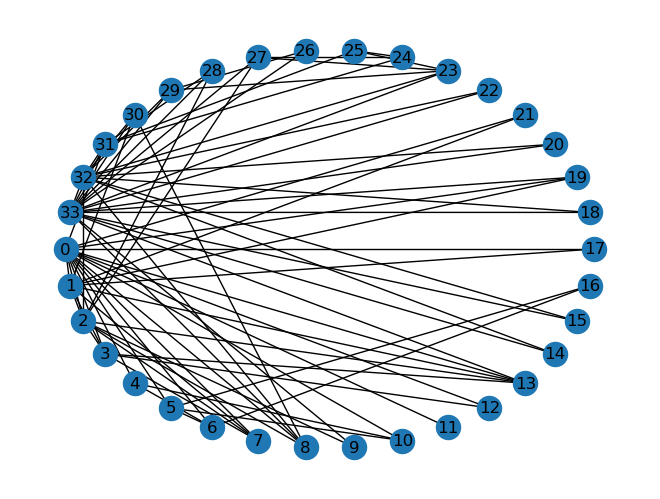

In [2]:
# create a graph from zachary's karate club
G = nx.karate_club_graph()
nx.draw_shell(G, with_labels=True)
plt.show()

## Centrality measure

In [3]:
# import shapG
import shapG.shapley as shapley
import shapG.plot as shapGplot

### use the default characteristic function

```python
def coalition_degree(G, S):
    """characteristic function of a coalition in a graph

    Args:
        G (nx.Graph): the graph
        S (list/set): list/set of nodes to generate teh coalition

    Returns:
        int: the marginal contribution of the coalition
    """
    subgraph = G.subgraph(S)
    return sum(dict(subgraph.degree(weight='weight')).values()) / 2
```

100%|██████████| 34/34 [00:21<00:00,  1.57it/s]


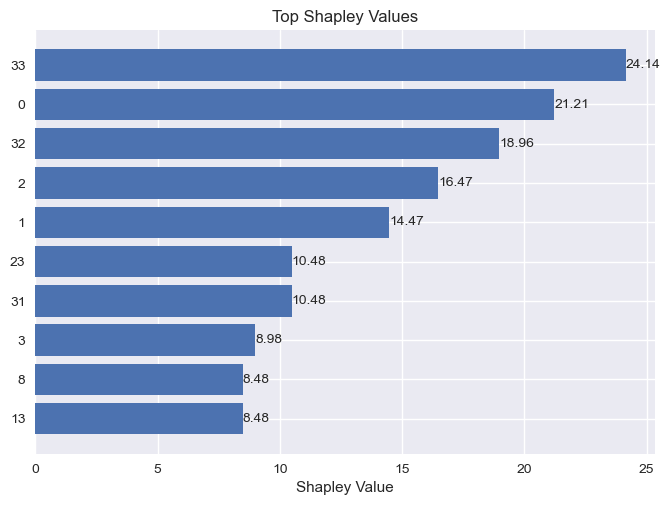

In [4]:
# the default characteristic function
shapley_values = shapley.shapG(G, depth=1, m=15, approximate_by_ratio=True, scale=True)
shapGplot.plot(shapley_values)

100%|██████████| 34/34 [00:21<00:00,  1.59it/s]


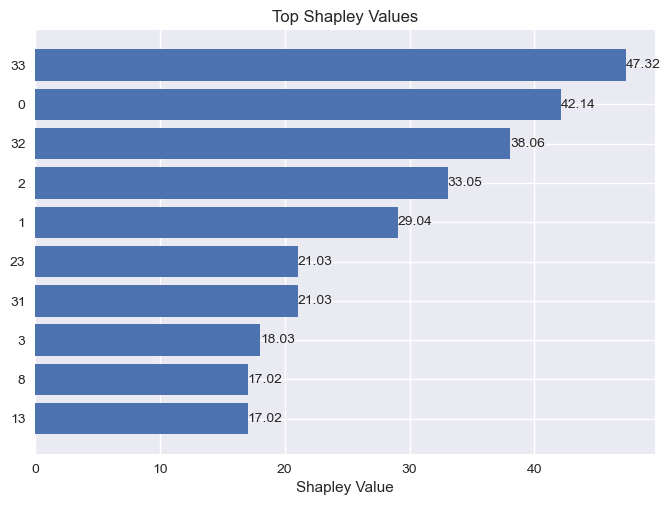

In [5]:
# let's define a custom characteristic function by modification the sum
def coalition_degree_new(G, S):
    """characteristic function of a coalition in a graph

    Args:
        G (nx.Graph): the graph
        S (list/set): list/set of nodes to generate teh coalition

    Returns:
        int: the marginal contribution of the coalition
    """
    subgraph = G.subgraph(S)
    return sum(dict(subgraph.degree(weight='weight')).values())
# the new characteristic function
shapley_values_new = shapley.shapG(G, f=coalition_degree_new, depth=1, m=15, approximate_by_ratio=True, scale=True)
shapGplot.plot(shapley_values_new)